In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import sklearn
import plotly.graph_objects as go
import plotly.express as px
from joblib import Parallel, delayed
import joblib
from collections import Counter

In [ ]:
df = pd.read_csv('Concat-New.csv')

In [ ]:
df.head()

,CO2 (ppm),TVOC (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temperature (C),Humidity (%),Sound (dB),Activity
0,400,225,51,71,76,34.4,18.2,78.5,No Cooking
1,400,231,51,72,76,34.4,18.2,62.4,No Cooking
2,400,234,51,72,76,34.4,18.2,62.7,No Cooking
3,400,239,50,71,76,34.4,18.2,62.4,No Cooking
4,400,229,50,71,76,34.4,18.2,65.9,No Cooking


In [ ]:
df['activity_label'] = df['Activity'].map({'Frying':2,'Boiling': 1, 'No Cooking': 0})

In [ ]:
df=df.drop(columns=["Activity"])

<Axes: xlabel='activity_label'>

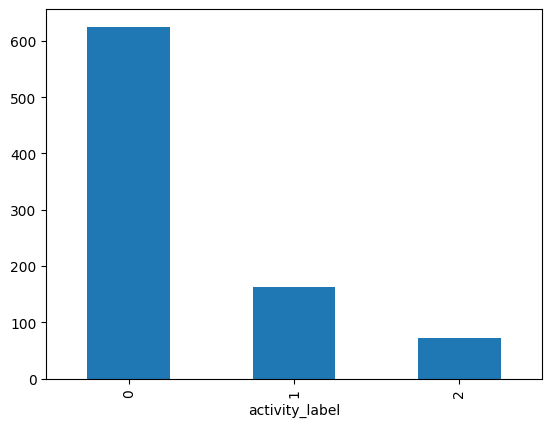

In [ ]:
df['activity_label'].value_counts().plot(kind = 'bar')

In [ ]:
df.columns

Index(['CO2 (ppm)', 'TVOC (ppb)', 'PM1 (ug/m3)', 'PM2.5 (ug/m3)',
       'PM10 (ug/m3)', 'Temperature (C)', 'Humidity (%)', 'Sound (dB)',
       'activity_label'],
      dtype='object')

In [ ]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        print(column)

CO2 (ppm)
TVOC (ppb)
PM1 (ug/m3)
PM2.5 (ug/m3)
PM10 (ug/m3)
Temperature (C)
Humidity (%)
Sound (dB)
activity_label


In [ ]:
df["PM10 (ug/m3)"] = df["PM10 (ug/m3)"].str.strip()
df["PM10 (ug/m3)"] = pd.to_numeric(df["PM10 (ug/m3)"], errors='coerce')

AttributeError: Can only use .str accessor with string values!

In [ ]:
nan_count = df["PM10 (ug/m3)"].isna().sum()
print(nan_count)

0


In [ ]:
df = df.dropna(subset=["PM10 (ug/m3)"])

In [ ]:
df.head()

,CO2 (ppm),TVOC (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temperature (C),Humidity (%),Sound (dB),activity_label
0,400,225,51,71,76.0,34.4,18.2,78.5,0
1,400,231,51,72,76.0,34.4,18.2,62.4,0
2,400,234,51,72,76.0,34.4,18.2,62.7,0
3,400,239,50,71,76.0,34.4,18.2,62.4,0
4,400,229,50,71,76.0,34.4,18.2,65.9,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['activity_label'])
y = df['activity_label']  # Target variable
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.4)

In [ ]:
X.head()

,CO2 (ppm),TVOC (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temperature (C),Humidity (%),Sound (dB)
0,400,225,51,71,76,34.4,18.2,78.5
1,400,231,51,72,76,34.4,18.2,62.4
2,400,234,51,72,76,34.4,18.2,62.7
3,400,239,50,71,76,34.4,18.2,62.4
4,400,229,50,71,76,34.4,18.2,65.9


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test,y_test)

0.9971014492753624

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_test, y_test)

0.9971014492753624

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
train_accuracy = rf.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.2f}')


Training Accuracy: 1.00


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean():.2f}')


Cross-validation scores: [0.92533333 0.96       1.         1.         0.9197861 ]
Mean cross-validation score: 0.96


In [ ]:
print(df['activity_label'].value_counts())

activity_label
1    1218
0     655
Name: count, dtype: int64


# ML Model Pipeline

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import warnings
import time
warnings.filterwarnings("ignore")
np.random.seed(42)

class MultiModelEvaluator:
    def __init__(self, models):
        self.models = models
        self.model_names = list(models.keys())
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.metric_scores = {}

    def split_data(self, X, y, test_size=0.4):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size)

    def train_models(self):
        for model_name, model in self.models.items():
            print(f"\n================================================\n{model_name} model has started training")
            start = time.time()
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', model)
            ])
            pipeline.fit(self.X_train, self.y_train)
            self.models[model_name] = pipeline
            print(f"{model_name} model has ended training. Time -> {round(time.time() - start, 2)}s. Accuracy - > {(pipeline.score(self.X_test, self.y_test) * 100.00):.2f} %\n================================================\n")

    def evaluate_models(self, X_test, y_test):
        for model_name, pipeline in self.models.items():
            Train_y_pred = pipeline.predict(self.X_train)
            Train_accuracy = accuracy_score(self.y_train, Train_y_pred)
            Train_f1_macro = f1_score(self.y_train, Train_y_pred, average='macro')
            Train_f1_weighted = f1_score(self.y_train, Train_y_pred, average='weighted')
            Train_recall_macro = recall_score(self.y_train, Train_y_pred, average='macro')
            Train_recall_weighted = recall_score(self.y_train, Train_y_pred, average='weighted')
            Train_precision_macro = precision_score(self.y_train, Train_y_pred, average='macro')
            Train_precision_weighted = precision_score(self.y_train, Train_y_pred, average='weighted')
            Train_confusion = confusion_matrix(self.y_train, Train_y_pred)

            Test_y_pred = pipeline.predict(X_test)
            Test_accuracy = accuracy_score(y_test, Test_y_pred)
            Test_f1_macro = f1_score(y_test, Test_y_pred, average='macro')
            Test_f1_weighted = f1_score(y_test, Test_y_pred, average='weighted')
            Test_recall_macro = recall_score(y_test, Test_y_pred, average='macro')
            Test_recall_weighted = recall_score(y_test, Test_y_pred, average='weighted')
            Test_precision_macro = precision_score(y_test, Test_y_pred, average='macro')
            Test_precision_weighted = precision_score(y_test, Test_y_pred, average='weighted')
            Test_confusion = confusion_matrix(y_test, Test_y_pred)

            self.metric_scores[model_name] = {
                'Train Accuracy': Train_accuracy,
                'Train F1 Macro': Train_f1_macro,
                'Train F1 Weighted': Train_f1_weighted,
                'Train Recall Macro': Train_recall_macro,
                'Train Recall Weighted': Train_recall_weighted,
                'Train Precision Macro': Train_precision_macro,
                'Train Precision Weighted': Train_precision_weighted,
                'Train Confusion Matrix': Train_confusion,
                'Test Accuracy': Test_accuracy,
                'Test F1 Macro': Test_f1_macro,
                'Test F1 Weighted': Test_f1_weighted,
                'Test Recall Macro': Test_recall_macro,
                'Test Recall Weighted': Test_recall_weighted,
                'Test Precision Macro': Test_precision_macro,
                'Test Precision Weighted': Test_precision_weighted,
                'Test Confusion Matrix': Test_confusion
            }

    def get_metric_scores(self, model_name):
        return self.metric_scores.get(model_name, {})


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import warnings
import numpy as np
import time
warnings.filterwarnings("ignore")
np.random.seed(42)

class MultiModelEvaluatorWithTuning:
    def __init__(self, models, param_grids, n_iter_values = {}, n_jobs_values = {}, verbose_values = {}):
        self.models = models
        self.model_names = list(models.keys())
        self.param_grids = param_grids
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.n_iter_values = n_iter_values
        self.n_jobs_values = n_jobs_values
        self.verbose_values = verbose_values
        self.metric_scores = {}
        self.best_params = {}

    def split_data(self, X, y, test_size=0.4):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size)

    def train_models(self):
        for model_name, model in self.models.items():
            print(f"\n================================================\n{model_name} tuned model has started training")
            start = time.time()
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', model)
            ])
            if model_name not in self.n_iter_values:
                search = GridSearchCV(pipeline, self.param_grids[model_name], cv=5, n_jobs = self.n_jobs_values.get(model_name, -1), verbose = self.verbose_values.get(model_name, 1))
            else:
                search = RandomizedSearchCV(pipeline, self.param_grids[model_name], cv=5, n_jobs = self.n_jobs_values.get(model_name, -1), n_iter = self.n_iter_values.get(model_name, 10), verbose = self.verbose_values.get(model_name, 1))
            search.fit(self.X_train, self.y_train)
            best_model = search.best_estimator_
            self.models[model_name] = best_model
            self.best_params[model_name] = search.best_params_
            print(f"{model_name} tuned model has ended training. Time -> {round(time.time() - start, 2)}s. Accuracy - > {(best_model.score(self.X_test, self.y_test) * 100.00):.2f} %\n================================================\n")


    def evaluate_models(self, X_test, y_test):
        for model_name, pipeline in self.models.items():
            Train_y_pred = pipeline.predict(self.X_train)
            Train_accuracy = accuracy_score(self.y_train, Train_y_pred)
            Train_f1_macro = f1_score(self.y_train, Train_y_pred, average='macro')
            Train_f1_weighted = f1_score(self.y_train, Train_y_pred, average='weighted')
            Train_recall_macro = recall_score(self.y_train, Train_y_pred, average='macro')
            Train_recall_weighted = recall_score(self.y_train, Train_y_pred, average='weighted')
            Train_precision_macro = precision_score(self.y_train, Train_y_pred, average='macro')
            Train_precision_weighted = precision_score(self.y_train, Train_y_pred, average='weighted')
            Train_confusion = confusion_matrix(self.y_train, Train_y_pred)

            Test_y_pred = pipeline.predict(X_test)
            Test_accuracy = accuracy_score(y_test, Test_y_pred)
            Test_f1_macro = f1_score(y_test, Test_y_pred, average='macro')
            Test_f1_weighted = f1_score(y_test, Test_y_pred, average='weighted')
            Test_recall_macro = recall_score(y_test, Test_y_pred, average='macro')
            Test_recall_weighted = recall_score(y_test, Test_y_pred, average='weighted')
            Test_precision_macro = precision_score(y_test, Test_y_pred, average='macro')
            Test_precision_weighted = precision_score(y_test, Test_y_pred, average='weighted')
            Test_confusion = confusion_matrix(y_test, Test_y_pred)

            self.metric_scores[model_name] = {
                'Train Accuracy': Train_accuracy,
                'Train F1 Macro': Train_f1_macro,
                'Train F1 Weighted': Train_f1_weighted,
                'Train Recall Macro': Train_recall_macro,
                'Train Recall Weighted': Train_recall_weighted,
                'Train Precision Macro': Train_precision_macro,
                'Train Precision Weighted': Train_precision_weighted,
                'Train Confusion Matrix': Train_confusion,
                'Test Accuracy': Test_accuracy,
                'Test F1 Macro': Test_f1_macro,
                'Test F1 Weighted': Test_f1_weighted,
                'Test Recall Macro': Test_recall_macro,
                'Test Recall Weighted': Test_recall_weighted,
                'Test Precision Macro': Test_precision_macro,
                'Test Precision Weighted': Test_precision_weighted,
                'Test Confusion Matrix': Test_confusion
            }

    def get_metric_scores(self, model_name):
        return self.metric_scores.get(model_name, {})

    def get_best_params(self, model_name):
        return self.best_params.get(model_name, {})

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

class DeepModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(DeepModel, self).__init__()
        layers = []
        in_features = input_size

        # Input normalization
        layers.append(nn.BatchNorm1d(input_size))

        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(in_features, hidden_size))
            # Batch normalization for hidden layers
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            in_features = hidden_size

        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

def ann_model(X, y, test_size = 0.2):
    # Evaluate the best model on the test set
    def evaluate_accuracy(model, data_loader):
        model.eval()
        total_correct = 0
        total_samples = 0
        with torch.no_grad():
            for inputs, labels in data_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total_correct += (predicted == labels).sum().item()
                total_samples += labels.size(0)
        accuracy = total_correct / total_samples
        return accuracy

    # Convert to PyTorch tensors
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    # Convert data to PyTorch dataset
    dataset = data.TensorDataset(X, y)

    # Split the data into train, dev, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=42)
    X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Create PyTorch DataLoader for each set
    train_loader = data.DataLoader(data.TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
    dev_loader = data.DataLoader(data.TensorDataset(X_dev, y_dev), batch_size=32, shuffle=False)
    test_loader = data.DataLoader(data.TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

    # Define hyperparameters to try
    learning_rate = 0.01
    num_epochs = 50

    # Function to train and evaluate the model
    def train_and_evaluate(model, learning_rate):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)

        # Lists to store convergence data
        train_losses = []
        dev_losses = []
        train_accuracies = []
        dev_accuracies = []

        # Training loop
        for epoch in range(num_epochs):
            model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            # Compute and store losses and accuracies
            train_loss = loss.item()
            train_losses.append(train_loss)
            train_acc = evaluate_accuracy(model, train_loader)
            train_accuracies.append(train_acc)
            dev_acc = evaluate_accuracy(model, dev_loader)
            dev_accuracies.append(dev_acc)
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Dev Accuracy: {dev_acc:.4f}")

        # Plot convergence graph
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
        plt.plot(range(1, num_epochs + 1), dev_accuracies, label='Dev Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Evaluation
        model.eval()
        total_correct = 0
        total_samples = 0
        predicted_labels = []
        with torch.no_grad():
            for inputs, labels in dev_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total_correct += (predicted == labels).sum().item()
                total_samples += labels.size(0)
                predicted_labels.extend(predicted.tolist())

        accuracy = total_correct / total_samples

        # Classification report and F1-score
        print("Classification Report:")
        print(classification_report(y_dev, predicted_labels))
        f1 = f1_score(y_dev, predicted_labels, average='weighted')
        print(f"F1-Score: {f1:.4f}")

        return accuracy

    # Define different configurations for hidden layers and units
    hidden_layers_configs = [
        [16, 8],  # 2 hidden layers with 16 and 8 units
        [32, 16, 8],  # 3 hidden layers with 32, 16, and 8 units
        [64, 32, 16, 8]  # 4 hidden layers with 64, 32, 16, and 8 units
    ]

    # Train and evaluate models with different configurations
    best_accuracy = 0.0
    best_model = None
    for hidden_layers in hidden_layers_configs:
        model = DeepModel(input_size=X.shape[1], hidden_sizes=hidden_layers, output_size=y.shape[0])
        accuracy = train_and_evaluate(model, learning_rate)
        print(f"Hidden layers configuration: {hidden_layers}, Accuracy: {accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    print(f"Best model hidden layers configuration: {best_model.layers}, Best accuracy: {best_accuracy}")
    test_accuracy = evaluate_accuracy(best_model, test_loader)
    print(f"Test Accuracy: {test_accuracy}")
    return best_model

In [ ]:
def original_ml_pipeline_obj(x, y, test_size = 0.4):
    # Define the machine learning models
    models = {
        'LogisticRegression': LogisticRegression(solver = 'liblinear'),
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(kernel = 'rbf', gamma = 0.1, C = 1.0),
        'Linear SVM': SVC(kernel="linear", C=0.025, random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state = 42),
        'RandomForest': RandomForestClassifier(),
        'XGB': XGBClassifier(use_label_encoder = False),
        'LGBM': LGBMClassifier(n_estimators = 1000, random_state = 42, n_jobs = -1, verbosity = -1),
        'GradientBoosting': GradientBoostingClassifier(),
        # 'MLP Neural Net': MLPClassifier(alpha=1, max_iter=1000, random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "Naive Bayes": GaussianNB(),
        # "QDA": QuadraticDiscriminantAnalysis(),
    }

    # Initialize the MultiModelEvaluator
    evaluator = MultiModelEvaluator(models)

    # Split the data into training and testing sets
    evaluator.split_data(x, y, test_size = test_size)

    # Train the models
    evaluator.train_models()

    # Evaluate the models
    evaluator.evaluate_models(evaluator.X_test, evaluator.y_test)

    # Get metric scores for a specific model
    # model_name = 'RandomForest'
    # scores = evaluator.get_metric_scores(model_name)
    # print(f'Metric Scores for Model {model_name}:')
    # for metric, score in scores.items():
    #     print(f'{metric}: {score}')
    return evaluator

In [ ]:
def evaluate_result(evaluator):
    result = {'Model Name': [], 'Train Accuracy': [], 'Train F1 Macro': [], 'Train F1 Weighted': [], 'Train Recall Macro': [],
              'Train Recall Weighted': [], 'Train Precision Macro': [], 'Train Precision Weighted': [],
              'Test Accuracy': [], 'Test F1 Macro': [], 'Test F1 Weighted': [], 'Test Recall Macro': [],
              'Test Recall Weighted': [], 'Test Precision Macro': [], 'Test Precision Weighted': []
              }

    for model_name in evaluator.metric_scores:
        result['Model Name'].append(model_name)
        for metric_name in list(result.keys())[1:]:
            result[metric_name].append(round(evaluator.metric_scores[model_name][metric_name] * 100.00, 2))

    result = pd.DataFrame(result).T
    result.rename(columns=result.iloc[0], inplace = True)
    result.drop(result.index[0], inplace = True)
    result.index = pd.MultiIndex.from_tuples(
        [('Train', metric.replace('Train ', '')) if i < 7 else ('Test', metric.replace('Test ', '')) for i, metric in enumerate(result.index)],
        names=['', 'Metrics'])
    result.index.names = ['',  'Metrics']
    return result

In [ ]:
def evaluate_ann(model, X_train, X_test, y_train, y_test):
    model.eval()
    with torch.no_grad():
        Train_y_pred = torch.max(model(torch.tensor(X_train, dtype=torch.float32)), 1)[1].numpy()
    Train_accuracy = accuracy_score(y_train, Train_y_pred)
    Train_f1_macro = f1_score(y_train, Train_y_pred, average='macro')
    Train_f1_weighted = f1_score(y_train, Train_y_pred, average='weighted')
    Train_recall_macro = recall_score(y_train, Train_y_pred, average='macro')
    Train_recall_weighted = recall_score(y_train, Train_y_pred, average='weighted')
    Train_precision_macro = precision_score(y_train, Train_y_pred, average='macro')
    Train_precision_weighted = precision_score(y_train, Train_y_pred, average='weighted')
    Train_confusion = confusion_matrix(y_train, Train_y_pred)

    model.eval()
    with torch.no_grad():
        Test_y_pred = torch.max(model(torch.tensor(X_test, dtype=torch.float32)), 1)[1].numpy()
    Test_accuracy = accuracy_score(y_test, Test_y_pred)
    Test_f1_macro = f1_score(y_test, Test_y_pred, average='macro')
    Test_f1_weighted = f1_score(y_test, Test_y_pred, average='weighted')
    Test_recall_macro = recall_score(y_test, Test_y_pred, average='macro')
    Test_recall_weighted = recall_score(y_test, Test_y_pred, average='weighted')
    Test_precision_macro = precision_score(y_test, Test_y_pred, average='macro')
    Test_precision_weighted = precision_score(y_test, Test_y_pred, average='weighted')
    Test_confusion = confusion_matrix(y_test, Test_y_pred)

    metrics = {
                    'Train Accuracy': Train_accuracy,
                    'Train F1 Macro': Train_f1_macro,
                    'Train F1 Weighted': Train_f1_weighted,
                    'Train Recall Macro': Train_recall_macro,
                    'Train Recall Weighted': Train_recall_weighted,
                    'Train Precision Macro': Train_precision_macro,
                    'Train Precision Weighted': Train_precision_weighted,
                    'Train Confusion Matrix': Train_confusion,
                    'Test Accuracy': Test_accuracy,
                    'Test F1 Macro': Test_f1_macro,
                    'Test F1 Weighted': Test_f1_weighted,
                    'Test Recall Macro': Test_recall_macro,
                    'Test Recall Weighted': Test_recall_weighted,
                    'Test Precision Macro': Test_precision_macro,
                    'Test Precision Weighted': Test_precision_weighted,
                    'Test Confusion Matrix': Test_confusion
                }

    result = {'Model Name': [], 'Train Accuracy': [], 'Train F1 Macro': [], 'Train F1 Weighted': [], 'Train Recall Macro': [],
              'Train Recall Weighted': [], 'Train Precision Macro': [], 'Train Precision Weighted': [],
              'Test Accuracy': [], 'Test F1 Macro': [], 'Test F1 Weighted': [], 'Test Recall Macro': [],
              'Test Recall Weighted': [], 'Test Precision Macro': [], 'Test Precision Weighted': []
              }
    result['Model Name'].append('ANN')
    for metric_name in list(result.keys())[1:]:
        result[metric_name].append(round(metrics[metric_name] * 100.00, 2))

    result = pd.DataFrame(result).T
    result.rename(columns=result.iloc[0], inplace = True)
    result.drop(result.index[0], inplace = True)
    result.index = pd.MultiIndex.from_tuples(
        [('Train', metric.replace('Train ', '')) if i < 7 else ('Test', metric.replace('Test ', '')) for i, metric in enumerate(result.index)],
        names=['', 'Metrics'])
    result.index.names = ['',  'Metrics']
    return metrics, result

In [ ]:
def plot_feature_importances(models, model_names, feature_names):
    """
    Plot feature importances for a list of machine learning models.

    Parameters:
    - models (list): List of trained models.
    - model_names (list): Names of the models for labeling in the plot.
    - feature_names (list): Names of the features for labeling in the plot.

    Returns:
    - None
    """
    num_models = len(models)
    num_features = len(feature_names)

    for i in range(num_models):
        plt.figure(figsize=(10, 6))

        if isinstance(models[i], DecisionTreeClassifier) or isinstance(models[i], RandomForestClassifier):
            importances = models[i].feature_importances_
        elif isinstance(models[i], XGBClassifier) or isinstance(models[i], AdaBoostClassifier):
            importances = models[i].feature_importances_
        elif isinstance(models[i], LGBMClassifier):
            importances = models[i].feature_importances_
        elif isinstance(models[i], LogisticRegression):
            importances = np.abs(models[i].coef_[0])
        elif isinstance(models[i], MLPClassifier):
            importances = [np.sum(np.abs(layer), axis=1) for layer in [layer / np.linalg.norm(layer, ord=2, axis=0)
                            for layer in models[i].coefs_]][0]
        # elif isinstance(models[i], KNeighborsClassifier) or isinstance(models[i], SVC):
        #     importances = [1] * num_features  # KNN and SVM doesn't have feature importance, for instance let's say every feature importance is equal
        elif isinstance(models[i], GradientBoostingClassifier):
            importances = models[i].feature_importances_
        else:
            pass  # KNN, SVM, Naive Bayes and QDA doesn't have feature importance
            # raise ValueError(f"Unsupported model type: {type(models[i])}")

        # Sort feature importances in descending order
        sorted_indices = np.argsort(importances)[::-1]
        sorted_importances = [importances[idx] for idx in sorted_indices]  # Convert to a list of values
        sorted_feature_names = [feature_names[idx] for idx in sorted_indices]

        plt.bar(range(num_features), sorted_importances, tick_label=sorted_feature_names)
        plt.title(f'Feature Importances for {model_names[i]}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()

In [ ]:
df.isna().sum() * 100.00 / len(df)

,0
CO2 (ppm),0.0
TVOC (ppb),0.0
PM1 (ug/m3),0.0
PM2.5 (ug/m3),0.0
PM10 (ug/m3),0.0
Temperature (C),0.0
Humidity (%),0.0
Sound (dB),0.0
activity_label,0.0


In [ ]:
# Split data into x and y
kitchen_x = df.drop('activity_label', axis = 1)
kitchen_y = df['activity_label'].values  # converting to numpy array

# Scaling input variables, output variables doens't required as we are just predicting discrete outcomes
kitchen_x = st_x.fit_transform(kitchen_x)

In [ ]:
evaluator_ac_lab = original_ml_pipeline_obj(kitchen_x , kitchen_y, test_size = 0.4)


LogisticRegression model has started training
LogisticRegression model has ended training. Time -> 0.01s. Accuracy - > 95.65 %


KNN model has started training
KNN model has ended training. Time -> 0.0s. Accuracy - > 98.55 %


SVM model has started training
SVM model has ended training. Time -> 0.01s. Accuracy - > 99.42 %


Linear SVM model has started training
Linear SVM model has ended training. Time -> 0.02s. Accuracy - > 92.46 %


DecisionTree model has started training
DecisionTree model has ended training. Time -> 0.0s. Accuracy - > 99.42 %


RandomForest model has started training
RandomForest model has ended training. Time -> 0.66s. Accuracy - > 99.42 %


XGB model has started training
XGB model has ended training. Time -> 0.74s. Accuracy - > 99.42 %


LGBM model has started training
LGBM model has ended training. Time -> 0.72s. Accuracy - > 99.42 %


GradientBoosting model has started training
GradientBoosting model has ended training. Time -> 0.64s. Accuracy - > 99.42 %


Ad

In [ ]:
result_ac_classroom = evaluate_result(evaluator_ac_lab)
result_ac_classroom

LogisticRegression    KNN    SVM Linear SVM  \
      Metrics                                                          
Train Accuracy                        94.96  99.61  99.81      93.22   
      F1 Macro                        92.96  99.24  99.45      88.63   
      F1 Weighted                     94.73  99.61  99.81      92.88   
      Recall Macro                    89.98  98.91  99.24      84.43   
      Recall Weighted                 94.96  99.61  99.81      93.22   
      Precision Macro                  96.8  99.57  99.67      94.17   
      Precision Weighted              95.07  99.61  99.81      93.18   
Test  Accuracy                        95.65  98.55  99.42      92.46   
      F1 Macro                        92.69   97.3   98.3      86.17   
      F1 Weighted                     95.52  98.54  99.41      92.05   
      Recall Macro                    89.67  96.14   97.7      81.43   
      Recall Weighted                 95.65  98.55  99.42      92.46   
      Precision Macro                 96.27  98.55  98.99      92.84   
      Precision Weighted              95.64  98.55  99.44      92.38   

                         DecisionTree RandomForest    XGB   LGBM  \
      Metrics                                                      
Train Accuracy                  100.0        100.0  100.0  100.0   
      F1 Macro                  100.0        100.0  100.0  100.0   
      F1 Weighted               100.0        100.0  100.0  100.0   
      Recall Macro              100.0        100.0  100.0  100.0   
      Recall Weighted           100.0        100.0  100.0  100.0   
      Precision Macro           100.0        100.0  100.0  100.0   
      Precision Weighted        100.0        100.0  100.0  100.0   
Test  Accuracy                  99.42        99.42  99.42  99.42   
      F1 Macro                   98.3         98.3   98.3   98.3   
      F1 Weighted               99.41        99.41  99.41  99.41   
      Recall Macro               97.7         97.7   97.7   97.7   
      Recall Weighted           99.42        99.42  99.42  99.42   
      Precision Macro           98.99        98.99  98.99  98.99   
      Precision Weighted        99.44        99.44  99.44  99.44   

                         GradientBoosting AdaBoost Naive Bayes  
      Metrics                                                   
Train Accuracy                      100.0    99.42       96.51  
      F1 Macro                      100.0    98.39       91.01  
      F1 Weighted                   100.0    99.42       96.63  
      Recall Macro                  100.0    98.99       93.94  
      Recall Weighted               100.0    99.42       96.51  
      Precision Macro               100.0    97.87       90.32  
      Precision Weighted            100.0    99.46       97.52  
Test  Accuracy                      99.42    97.68       98.84  
      F1 Macro                       98.3    93.55       96.77  
      F1 Weighted                   99.41    97.72       98.86  
      Recall Macro                   97.7    94.58       97.92  
      Recall Weighted               99.42    97.68       98.84  
      Precision Macro               98.99    92.83       95.96  
      Precision Weighted            99.44    97.85       98.98

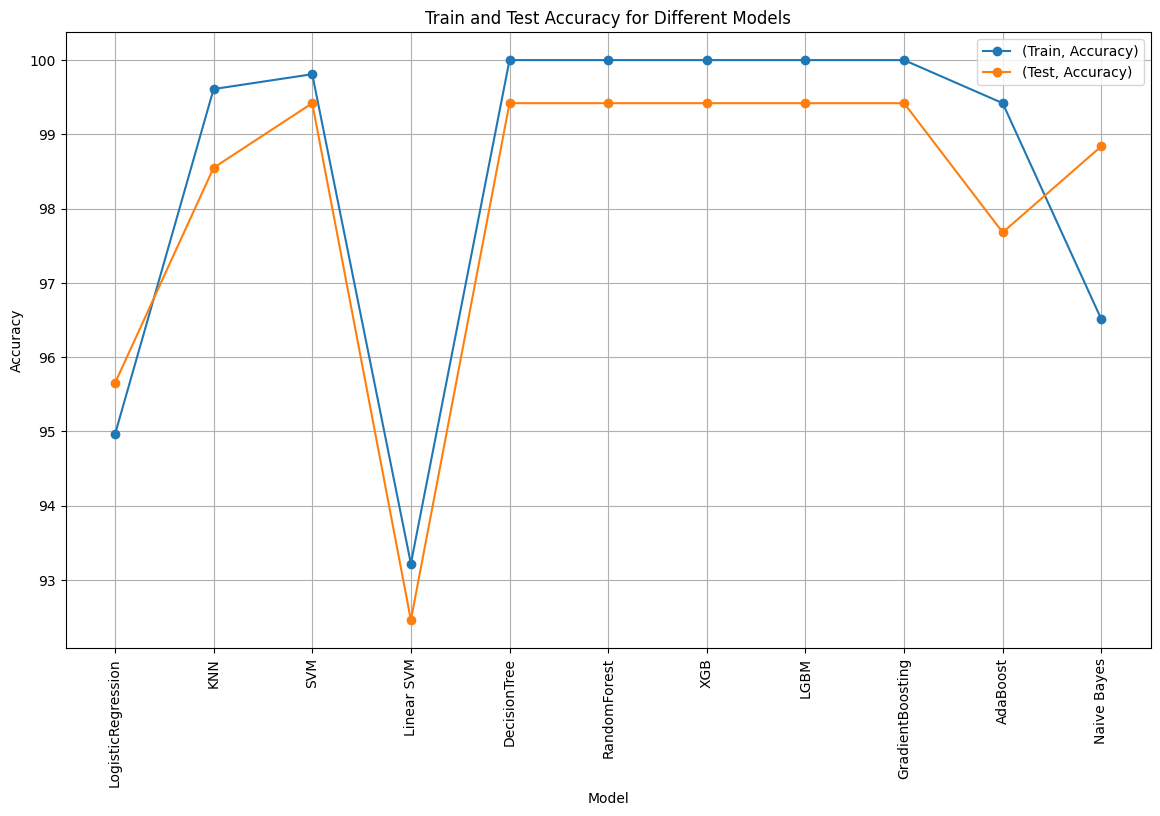

In [ ]:
metric_to_show = 'Accuracy'

ax = result_ac_classroom.loc[[('Train', metric_to_show), ('Test', metric_to_show)]].T.plot(marker='o', figsize=(14, 8))
plt.title(f'Train and Test {metric_to_show} for Different Models')
plt.xlabel('Model')
plt.ylabel(metric_to_show)
plt.xticks(np.arange(len(result_ac_classroom.columns.to_numpy())), result_ac_classroom.columns.to_numpy(), rotation=90)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
evaluator_ac_classroom_hyper_tuned = hyper_tuned_ml_pipeline_obj(kitchen_x, kitchen_y, test_size = 0.4)


LogisticRegression tuned model has started training
Fitting 5 folds for each of 40 candidates, totalling 200 fits
LogisticRegression tuned model has ended training. Time -> 6.87s. Accuracy - > 100.00 %


KNN tuned model has started training
Fitting 5 folds for each of 20 candidates, totalling 100 fits
KNN tuned model has ended training. Time -> 1.61s. Accuracy - > 99.87 %


SVM tuned model has started training
Fitting 5 folds for each of 49 candidates, totalling 245 fits
SVM tuned model has ended training. Time -> 3.69s. Accuracy - > 100.00 %


Linear SVM tuned model has started training
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Linear SVM tuned model has ended training. Time -> 0.2s. Accuracy - > 100.00 %


DecisionTree tuned model has started training
Fitting 5 folds for each of 4800 candidates, totalling 24000 fits
DecisionTree tuned model has ended training. Time -> 100.69s. Accuracy - > 99.73 %


RandomForest tuned model has started training
Fitting 5 folds for 

In [ ]:
result_non_ac_classroom_hyper_tuned = evaluate_result(evaluator_ac_classroom_hyper_tuned)
result_non_ac_classroom_hyper_tuned

LogisticRegression    KNN    SVM Linear SVM  \
      Metrics                                                          
Train Accuracy                        100.0  100.0  99.91      99.91   
      F1 Macro                        100.0  100.0   99.9       99.9   
      F1 Weighted                     100.0  100.0  99.91      99.91   
      Recall Macro                    100.0  100.0  99.93      99.87   
      Recall Weighted                 100.0  100.0  99.91      99.91   
      Precision Macro                 100.0  100.0  99.87      99.93   
      Precision Weighted              100.0  100.0  99.91      99.91   
Test  Accuracy                        100.0  99.87  100.0      100.0   
      F1 Macro                        100.0  99.86  100.0      100.0   
      F1 Weighted                     100.0  99.87  100.0      100.0   
      Recall Macro                    100.0   99.9  100.0      100.0   
      Recall Weighted                 100.0  99.87  100.0      100.0   
      Precision Macro                 100.0  99.81  100.0      100.0   
      Precision Weighted              100.0  99.87  100.0      100.0   

                         DecisionTree RandomForest    XGB   LGBM  \
      Metrics                                                      
Train Accuracy                  100.0        100.0  100.0  100.0   
      F1 Macro                  100.0        100.0  100.0  100.0   
      F1 Weighted               100.0        100.0  100.0  100.0   
      Recall Macro              100.0        100.0  100.0  100.0   
      Recall Weighted           100.0        100.0  100.0  100.0   
      Precision Macro           100.0        100.0  100.0  100.0   
      Precision Weighted        100.0        100.0  100.0  100.0   
Test  Accuracy                  99.73        100.0  100.0  100.0   
      F1 Macro                  99.71        100.0  100.0  100.0   
      F1 Weighted               99.73        100.0  100.0  100.0   
      Recall Macro              99.79        100.0  100.0  100.0   
      Recall Weighted           99.73        100.0  100.0  100.0   
      Precision Macro           99.63        100.0  100.0  100.0   
      Precision Weighted        99.74        100.0  100.0  100.0   

                         GradientBoosting MLP Neural Net AdaBoost Naive Bayes  \
      Metrics                                                                   
Train Accuracy                      100.0          100.0    100.0       97.15   
      F1 Macro                      100.0          100.0    100.0       96.82   
      F1 Weighted                   100.0          100.0    100.0       97.14   
      Recall Macro                  100.0          100.0    100.0       96.53   
      Recall Weighted               100.0          100.0    100.0       97.15   
      Precision Macro               100.0          100.0    100.0       97.13   
      Precision Weighted            100.0          100.0    100.0       97.15   
Test  Accuracy                      99.87          100.0    100.0       98.53   
      F1 Macro                      99.86          100.0    100.0        98.4   
      F1 Weighted                   99.87          100.0    100.0       98.53   
      Recall Macro                   99.9          100.0    100.0       98.12   
      Recall Weighted               99.87          100.0    100.0       98.53   
      Precision Macro               99.81          100.0    100.0        98.7   
      Precision Weighted            99.87          100.0    100.0       98.54   

                            QDA  
      Metrics                    
Train Accuracy            96.35  
      F1 Macro            96.05  
      F1 Weighted         96.39  
      Recall Macro        97.22  
      Recall Weighted     96.35  
      Precision Macro      95.2  
      Precision Weighted   96.7  
Test  Accuracy             97.6  
      F1 Macro            97.43  
      F1 Weighted         97.62  
      Recall Macro        98.13  
      Recall Weighted      97.6  
      Prec

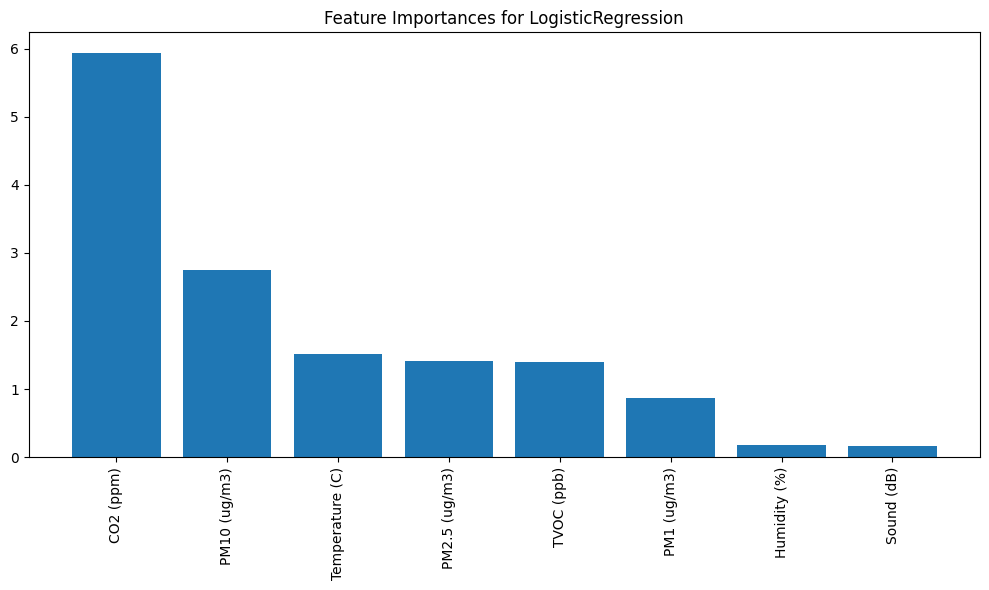

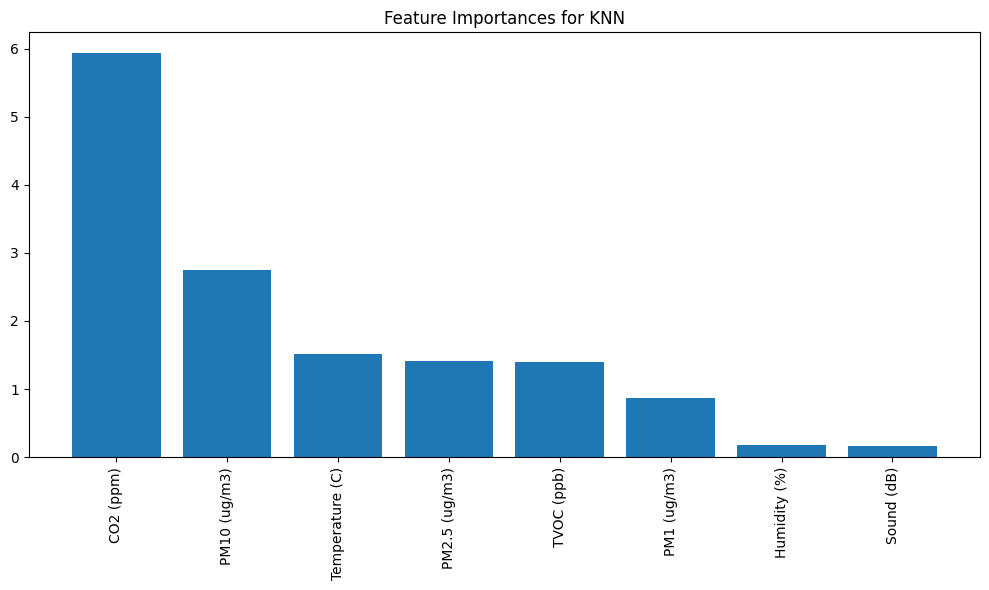

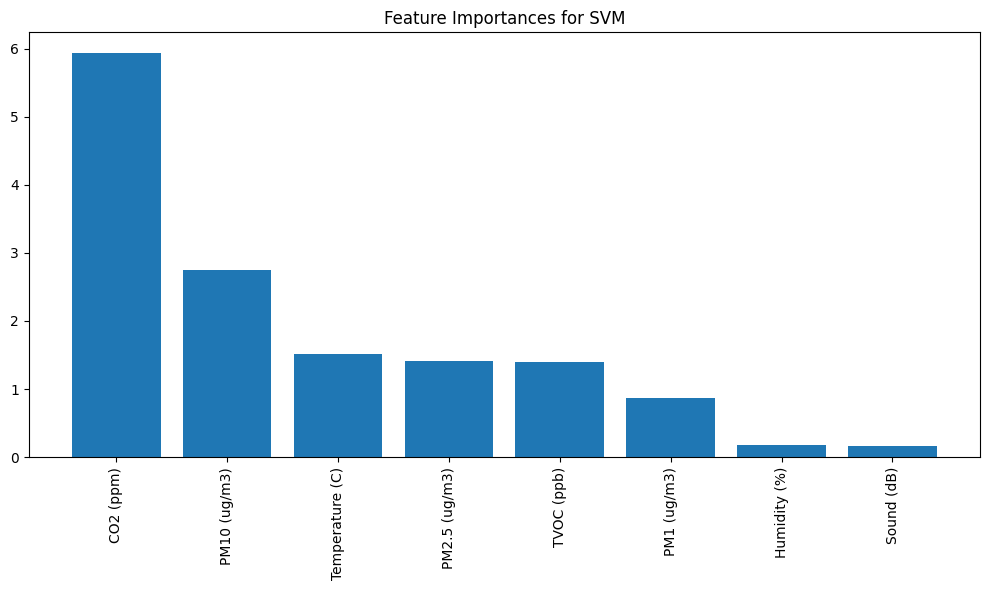

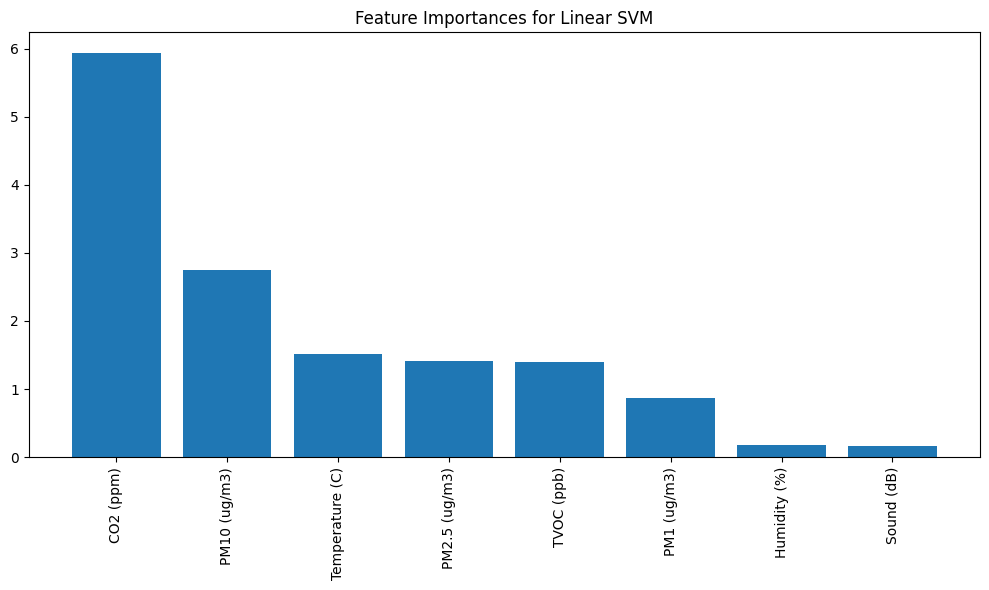

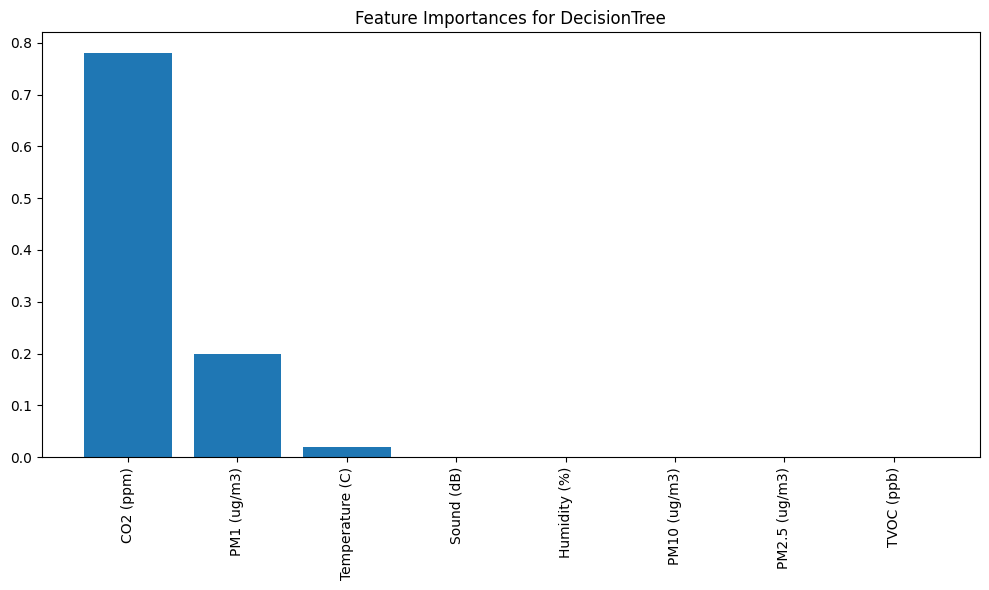

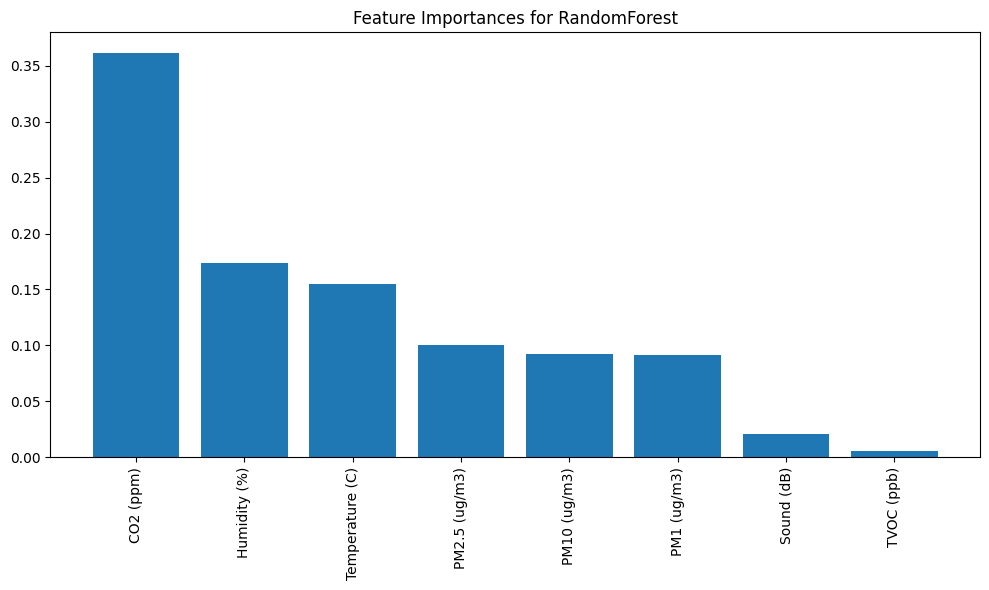

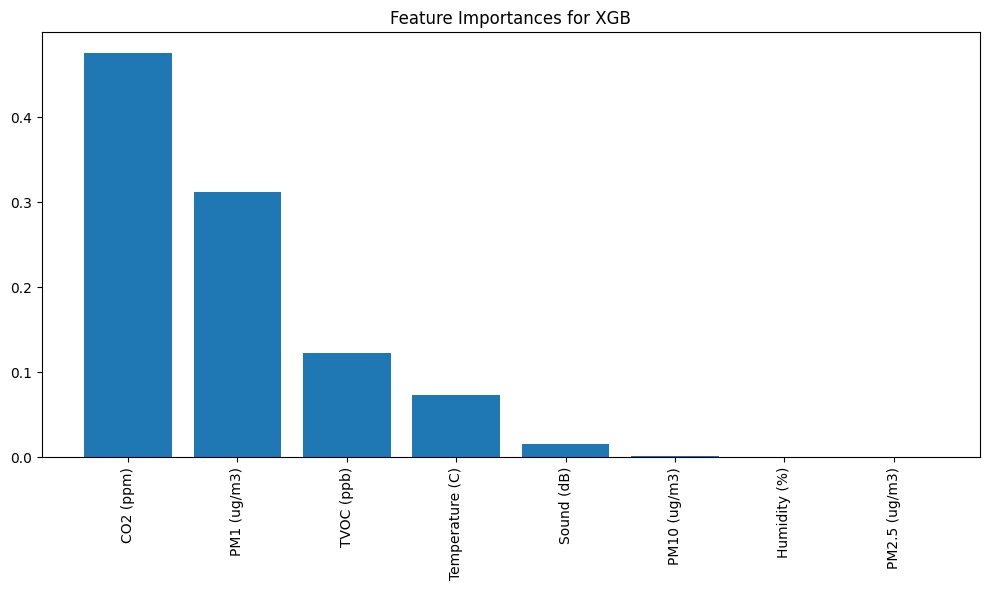

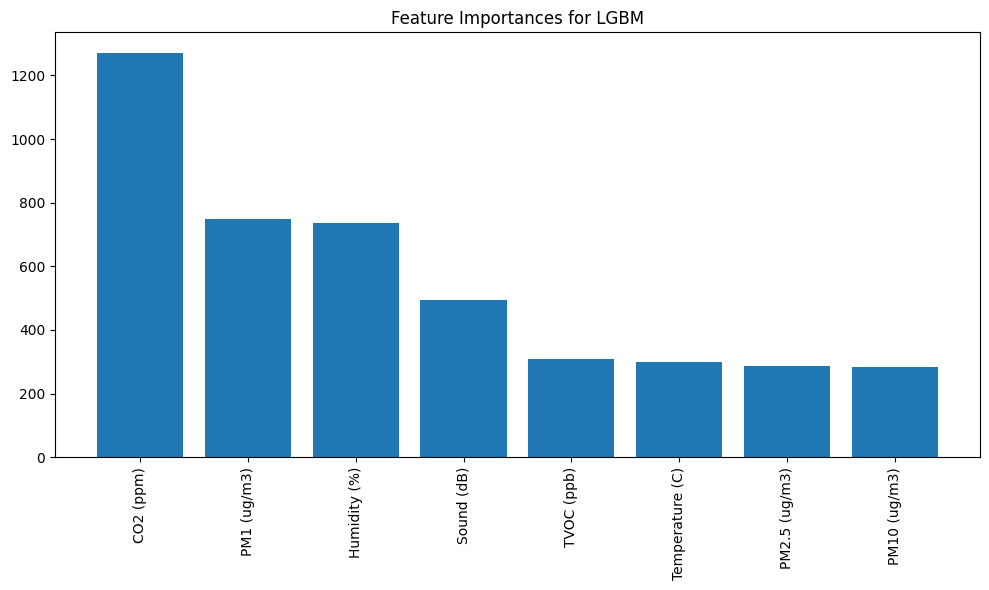

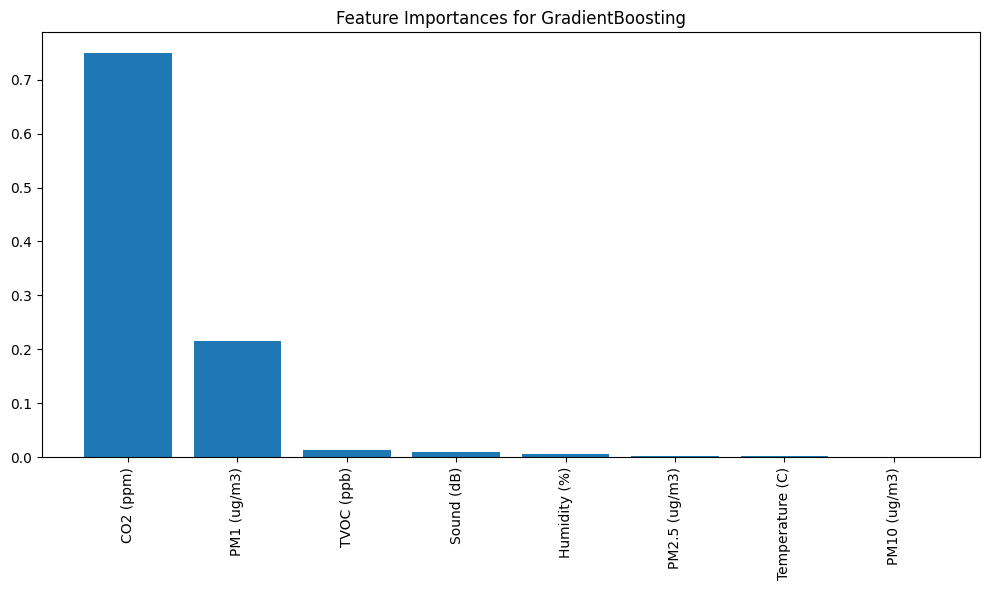

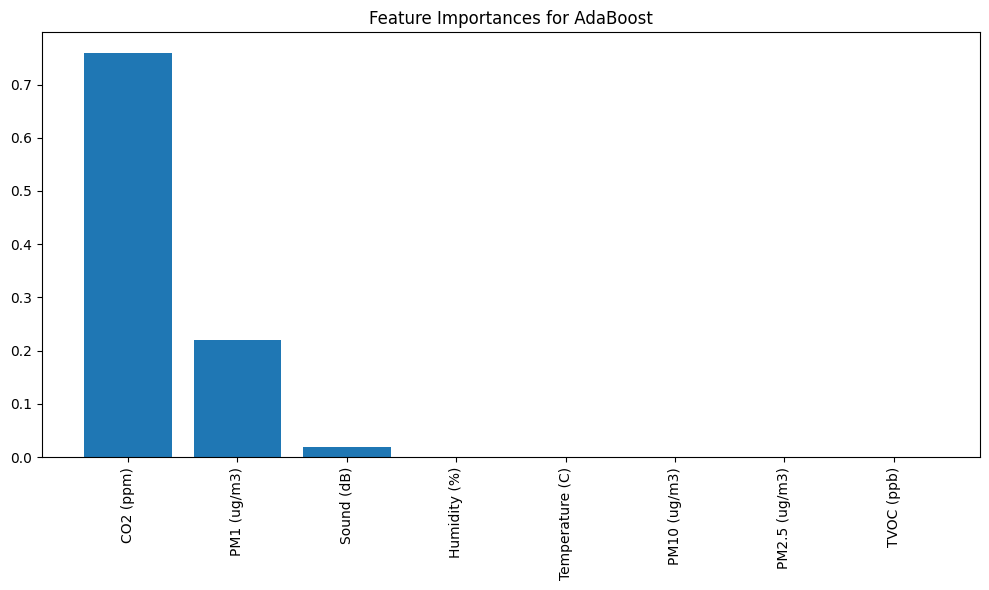

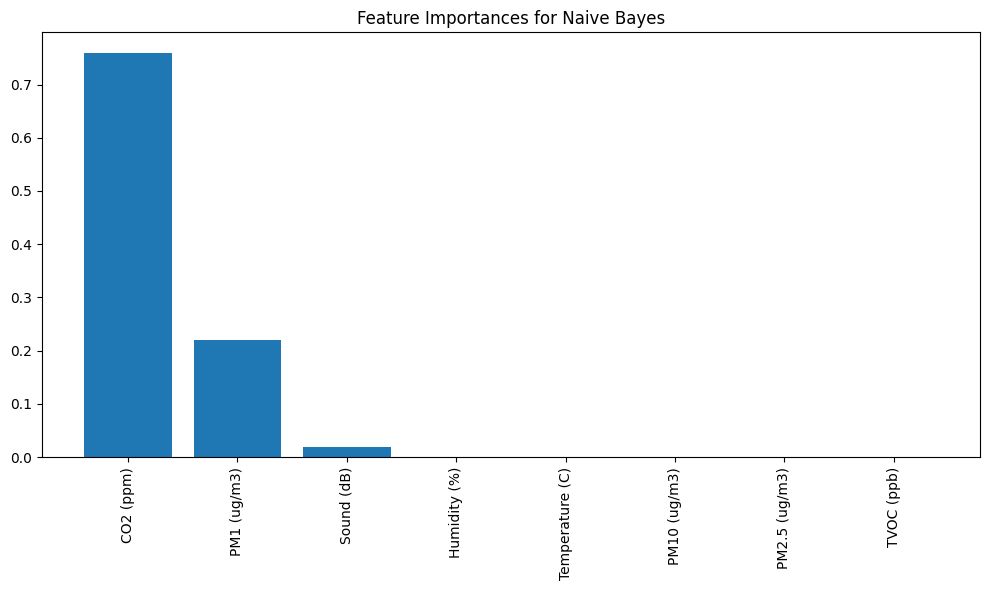

In [ ]:
model_names, models = [], []
for model_name in evaluator_ac_lab.model_names:
    model_names.append(model_name)
    models.append(evaluator_ac_lab.models[model_name].named_steps['classifier'])
plot_feature_importances(models, model_names, df.columns.to_numpy()[:-1])

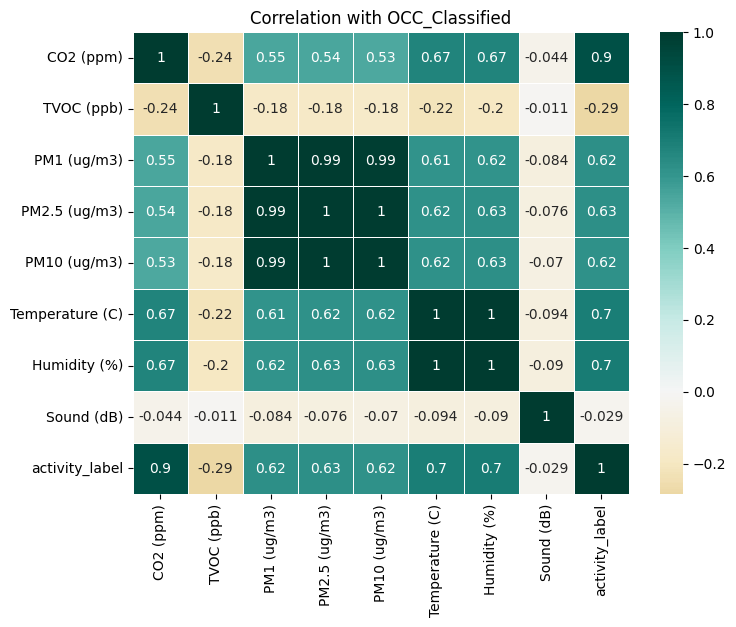

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
# Plotting the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', center=0, linewidths=0.5)

plt.title('Correlation with OCC_Classified')
plt.show()


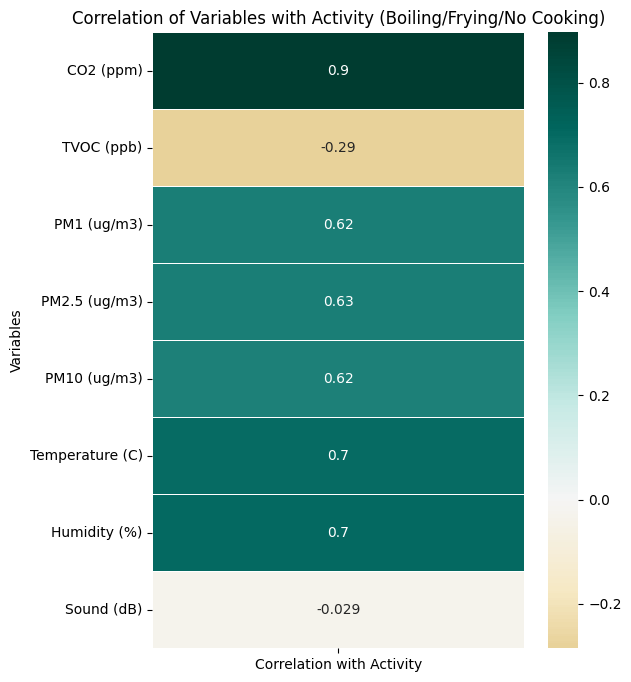

In [ ]:
correlation_with_activity = df.corr()['activity_label'].drop('activity_label')

# Convert the correlation results to a DataFrame for plotting
correlation_df = pd.DataFrame(correlation_with_activity)

# Rename the column for better labeling in the heatmap
correlation_df.columns = ['Correlation with Activity']
correlation_df.index.name = 'Variables'

# Plot the heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(correlation_df, annot=True, cmap='BrBG', center=0, linewidths=0.5)
plt.title('Correlation of Variables with Activity (Boiling/Frying/No Cooking)')
plt.show()